In [249]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score #model evaluation


%matplotlib inline

# 1. Simulating Data

In the following code block, I'm creating FAKE data in order to demonstrate how linear regression works. You won't be tested on how to write this kind of code directly (if you ever need to write it yourself, you'll be able to look it up and ask for help) but try to see if you understand what's going on.

Each time you use a np.random.XXXX function, you'll get *different* fake data, because it's randomly generated. Try it out! If you want your data to come out the SAME each time, add the line `np.random.seed(XXXX)` at the top of the next cell, where `XXXX` is any integer you want like 42, 8675309, or 1234.


## 1.1 Linear Regression Data Generation

In [250]:
# set population values for Cat length
np.random.seed(8675309)

# mean cat length in cm
mean_length_cm = 170

# standard deviation of cat length in cm
sd_length_cm = 15

# number of samples
n = 100

# generate random data for cat length that follows a normal distribution
length = np.random.normal(loc = mean_length_cm, scale = sd_length_cm, size = n)

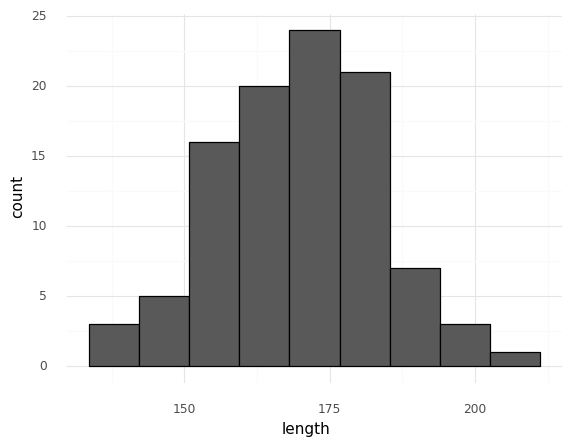

<ggplot: (8779577665515)>

In [251]:
# plot cat length data----
(ggplot(pd.DataFrame({"length": length}),
       aes(x = "length")) +
geom_histogram(color = "black") + 
theme_minimal())

In [252]:
# Set TRUE relationship between cat length and cat weight----

# true relationship between cat length and cat weight?
# i.e. As length increases by 1 cm, how much do we expect weight to increase?
true_coef = 0.04

# intercept: the expected weight of a cat that is 0 cm (doesn't make sense but that's math for you)
intercept = 0.2

In [253]:
# generate cat weights using list comprehension----

weight = intercept + length*true_coef + np.random.normal(0,1,n) # weight = intercept + length*coefficient + random error

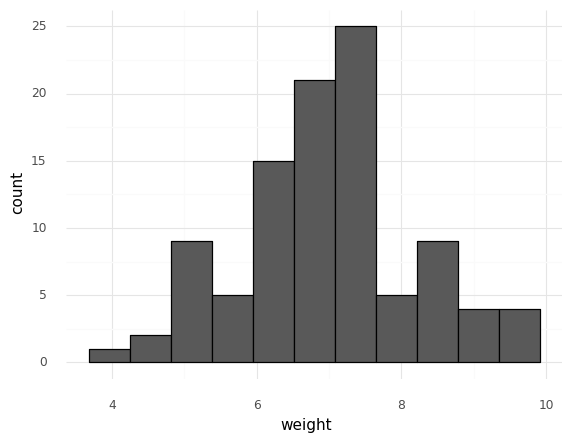

<ggplot: (8779578903212)>

In [254]:
# plot cat weight data----
(ggplot(pd.DataFrame({"weight": weight}),
       aes(x = "weight")) +
geom_histogram(color = "black") + 
theme_minimal())

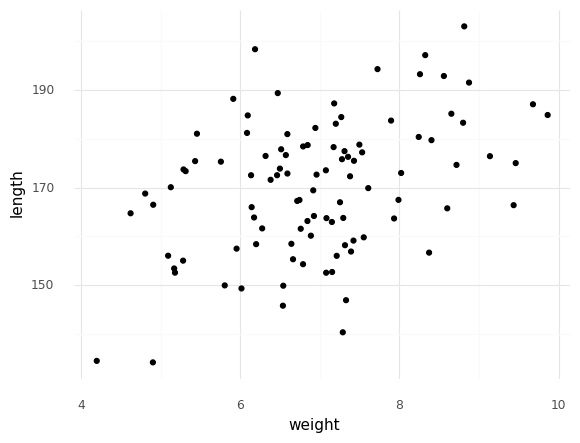

<ggplot: (8779577663976)>

In [255]:
# plot cat weight by cat length----
(ggplot(pd.DataFrame({"weight": weight,
                     "length": length}),
       aes(x = "weight", y = "length")) +
geom_point() + 
theme_minimal())

## 1.2 Fitting a Regression Model

In [256]:
cats = pd.DataFrame({"length": length, "weight": weight})

features = ["length"]
X = cats[features]
y = cats[["weight"]] #if you don't have the extra brackets, y will be a series instead of an array and throw an error


# run a linear regression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [257]:
# grab the coefficients from the model and store them in a data frame----

coef = pd.DataFrame({"Coef": lr.coef_[0], "Names": features})
coef = coef.append({"Coef": lr.intercept_[0], "Names": "intercept"}, ignore_index = True)
coef

,Coef,Names
0,0.034702,length
1,1.056641,intercept


The coefficient of length is 0.034702, and the intercept is 1.056641. The coefficient of length indicates that as length increases by 1 cm, we expect weight to increase by 0.035 kg.

### *Question*

Compare that to the TRUE population values we set above (hint: print `trueCoef` and `intercept`). How close are the numbers from *this* linear regression to the true values? What do you think will happen if we created another random sample? 100 random samples?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" style="width: 200px;"/>

In [258]:
### YOUR CODE HERE ###

 ### YOUR ANSWERS HERE ###

# 2. Fitting Linear Regressions on Multiple Datasets

In [259]:
def linearRegression(n = 100, trueCoef = 0.04, intercept = 0.2, error_sd = 1):
    
    # mean cat length in cm
    mean_length_cm = 170
    # standard deviation of cat length in cm
    sd_length_cm = 15
    
    # generate random data for cat length that follows a normal distribution
    length = np.random.normal(loc = mean_length_cm, scale = sd_length_cm, size = n)
    weight = intercept + length*true_coef + np.random.normal(0,error_sd,n)
    # weight = intercept + length*coefficient + random error
    
    cats = pd.DataFrame({"length": length, "weight": weight})

    features = ["length"]
    X = cats[features]
    y = cats[["weight"]] #if you don't have the extra brackets, y will be a series instead of an array and throw an error


    # run a linear regression
    lr = LinearRegression()
    lr.fit(X,y)
    
    # grab the coefficients from the model and store them in a data frame
    coef = pd.DataFrame({"Coef": lr.coef_[0], "Names": features})
    coef = coef.append({"Coef": lr.intercept_[0], "Names": "intercept"}, ignore_index = True)
    return({"coef": coef, "data": cats})
    

In [260]:
#run regression simulation 500 times
iWouldRun500Regressions = [linearRegression(n = 100, trueCoef = 0.04, intercept = 0.2) for x in range(0,500)]

# grab coefficients from 500 simulations
coef_df = pd.concat([x["coef"] for x in iWouldRun500Regressions])

# grab coefficients from 500 simulations
data_df = pd.concat([x["data"] for x in iWouldRun500Regressions])

# number simulations 0:499
data_df["simulation_no"] = sorted(list(range(0,500))*n)
coef_df["simulation_no"] = sorted(list(range(0,500))*2)

## 2.1 Let's Explore!

Now that we've run a bunch of simulations with the SAME true coefficient and intercept (but different random samples), let's look at the results of our 500 regression models.


First, let's just make some scatter plots to see some of the simulations. Notice how similar or different the simulations are from each other.

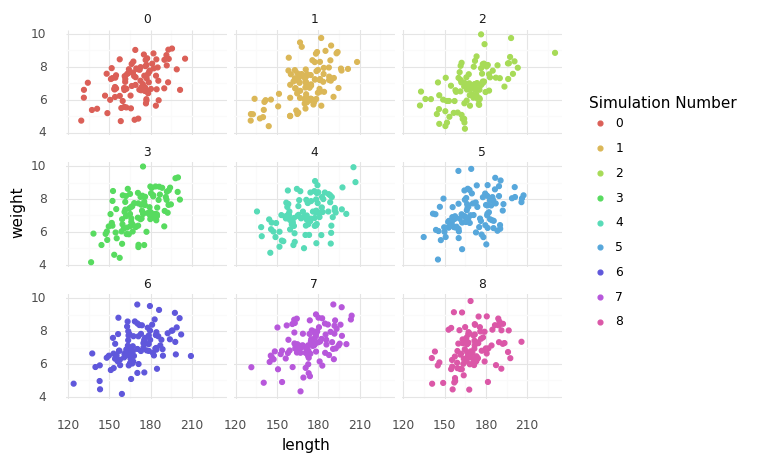

<ggplot: (8779579913629)>

In [261]:
n_plot = 9

chosen_datasets = data_df["simulation_no"] < 9

(ggplot(data_df.loc[chosen_datasets], aes(x = "length", y = "weight", color = "factor(simulation_no)")) +
geom_point() +
facet_wrap("~simulation_no") +
theme_minimal() +
labs(color = "Simulation Number"))

Let's look at the coefficient values from all the linear regressions we ran.

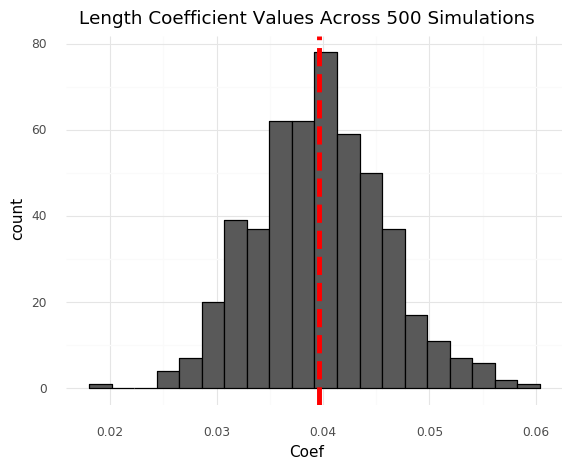

<ggplot: (8779578977085)>

In [262]:
# plot legnth coef values and mean length coef value (red line)----
coef_only = coef_df["Names"] == "length"


(ggplot(coef_df.loc[coef_only], aes(x = "Coef")) + 
geom_histogram(color = "black") +
geom_vline(xintercept = coef_df.loc[coef_only, "Coef"].mean(), color = "red", linetype = "dashed", size = 2) +
labs(title = "Length Coefficient Values Across 500 Simulations") +
theme_minimal())

In [263]:
print("The mean coefficient for length across the 500 simulations is: " + str(coef_df.loc[coef_only, "Coef"].mean()))

The mean coefficient for length across the 500 simulations is: 0.03964458623497787


### *Question*

Look at the different values you got for the coefficient of length. We set the TRUE coefficient value to be 0.04, think about and describe how spread apart the estimates from our 500 regression models are. Does seeing how different our coefficient estimates can be *change* how you think about the coefficient estimates you get in regression models on real data?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" style="width: 200px;"/>

### YOUR ANSWER HERE ###

# 3. Fitting MORE Linear Regressions on Multiple Datasets

This is your chance to play around with the different values in our simulation. Play around with these values to get a better understanding of how different values effect our linear regression output.

### *Question*
Here are some suggestions:

* Change `n`, the number of data points in each sample, to be very small (say 10), how does this change the results you saw?
* Change `n`, the number of data points in each sample, to be very large (say 1,000), how does this change the results you saw?
* Change the `error_sd` term, this is a measure of how much error is in the model. More error means that data is scattered tightly around the regression line, less error means that the data is scatters very loosely around the regression line. How does changing  `error_sd` change the results you originally saw?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" style="width: 200px;"/>

In [264]:
#run regression simulation 500 times----

#--- play around with these numbers-------
n = 100
trueCoef = 0.04
intercept = intercept
error_sd = 1
#-----------------------------------------

iWouldRun500More = [linearRegression(n = n, trueCoef = trueCoef, intercept = intercept, error_sd = error_sd) for x in range(0,500)]

# grab coefficients from 500 simulations
coef_df2 = pd.concat([x["coef"] for x in iWouldRun500More])

# grab coefficients from 500 simulations
data_df2 = pd.concat([x["data"] for x in iWouldRun500More])

# number simulations 0:499
data_df2["simulation_no"] = sorted(list(range(0,500))*n)
coef_df2["simulation_no"] = sorted(list(range(0,500))*2)

In [265]:
# plot a few of the simulated data ----

### YOUR CODE HERE ###

In [266]:
# plot the coefficients and EXPLORE! ----

### YOUR CODE HERE ###

### YOUR REFLECTIONS HERE ###

### *Question*
In prediction models, we often care most about the *accuracy* of the model. In Linear Regression we often measure that using the mean squared error. Using the `mean_squared_error()` function from sklean, and the other code in this notebook as an example, change the function `linearRegression()` below to calculate and store the mean squared error for each regression in a new dataframe, `mse`, and add it to the dictionary that the function returns. Then run the function 500 times, and plot a histogram of the mean squared errors. 

What does this histogram tell you about the accuracy of our models?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" style="width: 200px;"/>

In [ ]:
def linearRegression(n = 100, trueCoef = 0.04, intercept = 0.2, error_sd = 1):
    
    # mean cat length in cm
    mean_length_cm = 170
    # standard deviation of cat length in cm
    sd_length_cm = 15
    
    # generate random data for cat length that follows a normal distribution
    length = np.random.normal(loc = mean_length_cm, scale = sd_length_cm, size = n)
    
    # weight = intercept + length*coefficient + random error
    weight = intercept + length*true_coef + np.random.normal(0,error_sd,n)
    
    
    cats = pd.DataFrame({"length": length, "weight": weight})
    

    features = ["length"]
    X = cats[features]
    y = cats[["weight"]] #if you don't have the extra brackets, y will be a series instead of an array and throw an error


    # run a linear regression
    lr = LinearRegression()
    lr.fit(X,y)
    
    ##### ADD MSE CODE HERE ######
    mse = pass
    ###############################

    # grab the coefficients from the model and store them in a data frame
    coef = pd.DataFrame({"Coef": lr.coef_[0], "Names": features})
    coef = coef.append({"Coef": lr.intercept_[0], "Names": "intercept"}, ignore_index = True)
    
    return({"coef": coef, "data": cats, "mse": pass}) ##### DON'T FORGET to add the new mse data frame too! #####
    

In [ ]:
# Run your new simulations-----

iWouldRun500More2 = [linearRegression(n = n, trueCoef = trueCoef, intercept = intercept, error_sd = error_sd) for x in range(0,500)]

# grab coefficients from 500 simulations
coef_df3 = pd.concat([x["coef"] for x in iWouldRun500More2])

# grab coefficients from 500 simulations
data_df3 = pd.concat([x["data"] for x in iWouldRun500More2])

# grab mse from 500 simulations
mse_df3 = pd.concat([x["mse"] for x in iWouldRun500More2])

# number simulations 0:499
data_df3["simulation_no"] = sorted(list(range(0,500))*n)
coef_df3["simulation_no"] = sorted(list(range(0,500))*2)
mses_df3["simulation_no"] = list(range(0,500))

In [ ]:
# plot newly calculated mses ----